In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from OptionPlayTranslator import *

# parameters

In [54]:
ticker = 'AAPL'
start_date = ' 2021-03-04'

In [55]:

# srcDataFrame = pd.read_csv('optionsDX/aapl_2022/aapl_eod_2022q4-86egbl/aapl_eod_202210.txt')
srcDataFrame = pd.read_csv('AAPL_chains_reduced_21_22Jan.csv')

df = pd.DataFrame(srcDataFrame)
df.columns = df.columns.str.strip()
df.columns

/var/folders/p_/r9zh86p106b8yh2ly8zzjbw00000gn/T/ipykernel_50417/304695384.py:2: DtypeWarning: Columns (1,3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  srcDataFrame = pd.read_csv('AAPL_chains_reduced_21_22Jan.csv')


Index(['[QUOTE_DATE]', '[UNDERLYING_LAST]', '[EXPIRE_DATE]', '[DTE]',
       '[C_LAST]', '[C_BID]', '[C_ASK]', '[STRIKE]', '[P_BID]', '[P_ASK]',
       '[P_LAST]'],
      dtype='object')

In [56]:
dayGroups = df.groupby('[QUOTE_DATE]')
# print(dayGroups.head(2))
# dayGroups.head(1)

In [57]:

opt = OPT(ticker, dayGroups)
# print(opt.ticker)
# opt.find_plays(' 2019-10-01', ' 2020-01-16',200)

In [58]:
predictions = pd.read_csv('apple_predictions.csv')
# x = predictions.iloc[30]
# x

# PLOT ALL OUTCOMES

In [75]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    print(float(pred['Pred']))
    print(type(float(pred['Pred'])))
    play = (opt.find_plays(start_date,' '+pred['Date'],float(pred['Pred']),'ATM',100, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])

123.88159
<class 'float'>
121.9333
<class 'float'>
121.90835
<class 'float'>
119.04012
<class 'float'>
120.59625
<class 'float'>
120.79072
<class 'float'>
121.92767
<class 'float'>
121.90061
<class 'float'>
123.499695
<class 'float'>
125.09909
<class 'float'>
125.240265
<class 'float'>
122.79666
<class 'float'>
121.391785
<class 'float'>
122.880974
<class 'float'>
123.11762
<class 'float'>
121.738655
<class 'float'>
121.41761
<class 'float'>
121.698326
<class 'float'>
121.94805
<class 'float'>
121.18407
<class 'float'>
122.141106
<class 'float'>
123.08392
<class 'float'>
125.08379
<class 'float'>
126.083206
<class 'float'>
127.34079
<class 'float'>
129.18112
<class 'float'>
131.3155
<class 'float'>
131.21075
<class 'float'>
132.75328
<class 'float'>
132.14024
<class 'float'>
133.09813
<class 'float'>
133.37563
<class 'float'>
133.78589
<class 'float'>
133.05908
<class 'float'>
132.91432
<class 'float'>
132.06065
<class 'float'>
132.95543
<class 'float'>
133.60133
<class 'float'>
133.66

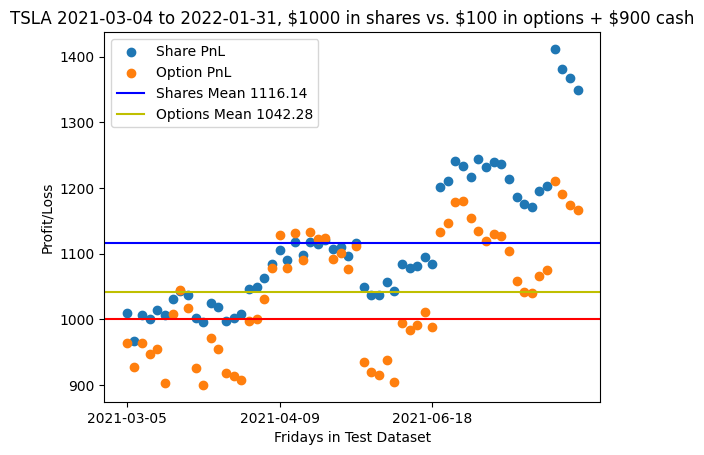

In [77]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $100 in options + $900 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
share_PnL_mean =round(( np.mean(sharePnL)),2)
option_PnL_mean = round((np.mean(optionPnL)),2)
plt.axhline(y=share_PnL_mean, color='b', linestyle='-', label=f'Shares Mean {share_PnL_mean}')
plt.axhline(y=option_PnL_mean, color='y', linestyle='-', label=f'Options Mean {option_PnL_mean}')
plt.legend()
plt.legend()

In [61]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])


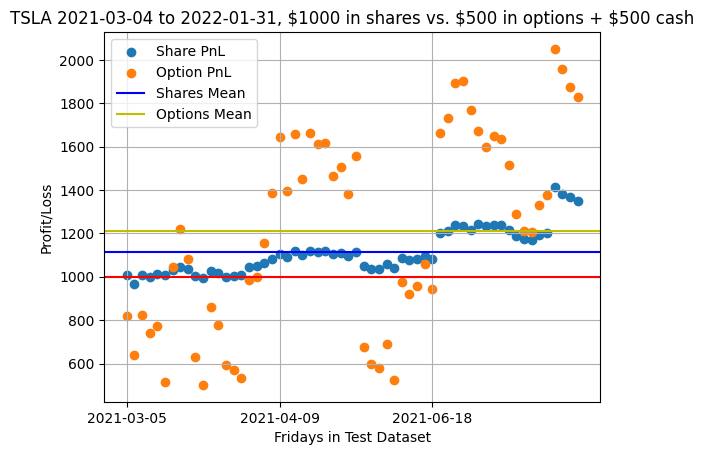

In [62]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $500 in options + $500 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label='Shares Mean')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label='Options Mean')
plt.legend()
plt.grid(True)

In [63]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_returns = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])
        predicted_returns.append(play[3])

In [64]:
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

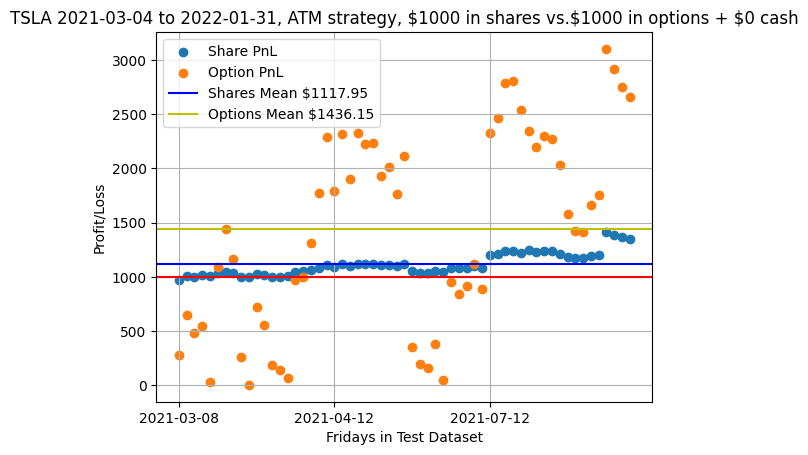

In [65]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, ATM strategy, $1000 in shares vs.$1000 in options + $0 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
shareMean = round((np.mean(sharePnL)),2)
optionMean = round((np.mean(optionPnL)),2)
plt.axhline(y=shareMean, color='b', linestyle='-', label=f'Shares Mean ${shareMean}')
plt.axhline(y=optionMean, color='y', linestyle='-', label=f'Options Mean ${optionMean}')
plt.legend()
plt.grid(True)

# PICKING SHARES OR OPTIONS BASED ON PREDICTED RETURNS

In [66]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []
# markers = []

# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        # markers.append('d')
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        # markers.append('o')


In [67]:
print( choose_higher_predicted)
print (choose_higher_actual)

[1004.08, 1041.07, 1011.96, 1058.53, 1098.42, 1104.8600000000001, 1041.86, 1079.28, 1309.7193120000009, 1206.56, 1158.18, 1394.1679499799998]
[1006.1512884455528, 996.5087281795511, 1007.5644222776392, 1105.5694098088113, 1115.1288445552786, 1116.375727348296, 1042.6433915211971, 1083.8736492103076, 2538.91, 1213.715710723192, 1203.9068994181216, 2661.25]


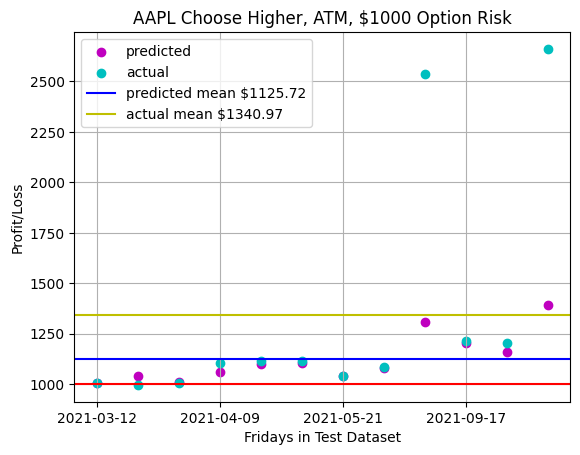

In [68]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
# plt.scatter(np.zeros(len(markers)), np.zeros(len(markers)), label='choose option', marker='o', color='black')
# plt.scatter(np.zeros(len(markers)), np.zeros(len(markers)), label='choose shares', marker='d', color='black')
plt.title(f'{ticker} Choose Higher, ATM, $1000 Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

# At the Money (ATM) vs. Find Best Strike

In [69]:
#hyperparameters
risk = 100
strike_strat = 'FIND_BEST_STRIKE'
ticker = 'AAPL'

In [70]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),{strike_strat},risk, 'FIND_BEST_STRIKE', False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []


# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        


AAPL on  2021-03-04 predicted to be 123.88159 on  2021-03-05
Predicted: baseline return: 2.977% P/L:$1029. Predicted Option return: 19.0% P/L: $1189.
Actual: baseline (shares): 0.906% P/L:$1009.  Option PnL: -3.649% P/L: $963. Result for options:$-45.55


AAPL on  2021-03-04 predicted to be 120.79072 on  2021-03-12
Predicted: baseline return: 0.408% P/L:$1004. Predicted Option return: -21.0% P/L: $791.
Actual: baseline (shares): 0.615% P/L:$1006.  Option PnL: -9.723% P/L: $902. Result for options:$-103.38


AAPL on  2021-03-04 predicted to be 125.240265 on  2021-03-19
Predicted: baseline return: 4.107% P/L:$1041. Predicted Option return: -7.000000000000001% P/L: $926.
Actual: baseline (shares): -0.349% P/L:$996.  Option PnL: -9.97% P/L: $900. Result for options:$-96.21


AAPL on  2021-03-04 predicted to be 121.738655 on  2021-03-26
Predicted: baseline return: 1.196% P/L:$1011. Predicted Option return: -18.0% P/L: $818.
Actual: baseline (shares): 0.756% P/L:$1007.  Option PnL: -9.293% 

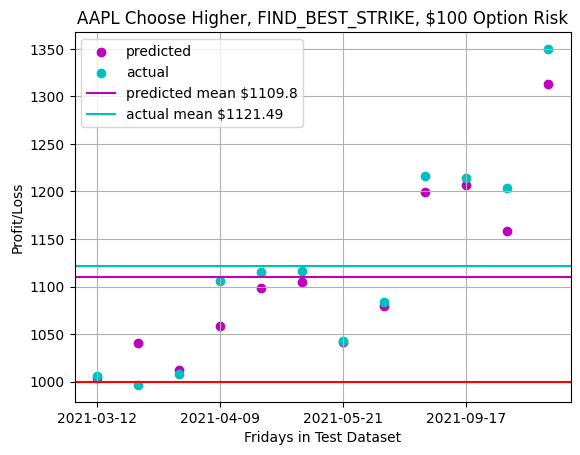

In [71]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
plt.title(f'{ticker} Choose Higher, {strike_strat}, ${risk} Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))

ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='m', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='c', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

same as above but slightly more in depth. doesnt show FIND_BEST_STRIKE because shares always getting chosen

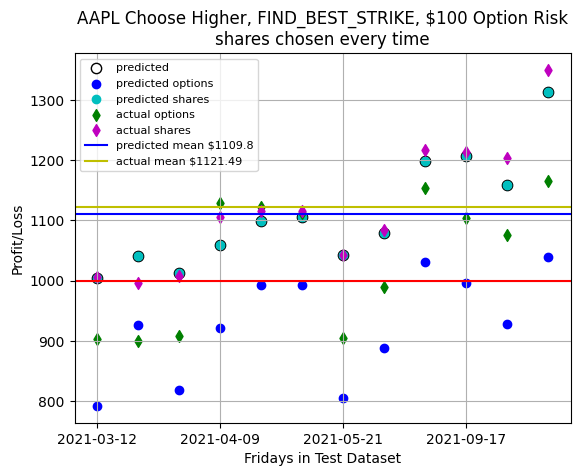

In [72]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', edgecolors='black', color='white',s=55)
plt.scatter(pred_dates, predicted_PnL_options, label='predicted options', color='b', marker='o',)
plt.scatter(pred_dates, predicted_PnL_shares, label='predicted shares', color='c', marker='o' )
plt.scatter(pred_dates, optionPnL, label='actual options', color='g', marker='d')
plt.scatter(pred_dates, sharePnL, label='actual shares', color='m', marker='d')

# plt.scatter(pred_dates, choose_higher_actual, label='actual', color='y', s=10)
plt.title(f'{ticker} Choose Higher, FIND_BEST_STRIKE, ${risk} Option Risk\nshares chosen every time')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
# plt.legend()
plt.legend( fontsize= "8",)
plt.grid(True)